Machine Learning:
* https://docs.google.com/document/d/19IUWXuYAUslloUSNARdwosS8IDdk0GMH7qX2xU6eL7o/edit?usp=sharing

* Link dataset: https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer
* Reference: https://www.kaggle.com/code/muhammadehabmuhammad/employee-salary-prediction-streamlit-app

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls /content/drive/MyDrive/MachineLearning/data

salary_dataset


In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
path = """/content/drive/MyDrive/MachineLearning/data/salary_dataset/Salary Data.csv"""
df = pd.read_csv(path)
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [6]:
empty_rows = df[df.isnull().any(axis=1)]
display(empty_rows)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna()
len(df)

373

In [8]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [9]:
print("Unique values in 'Education Level':")
print(df['Education Level'].unique())

print("\nUnique values in 'Job Title':")
print(df['Job Title'].unique())

print("\nUnique values in 'Years of Experience':")
print(df['Years of Experience'].unique())

Unique values in 'Education Level':
["Bachelor's" "Master's" 'PhD']

Unique values in 'Job Title':
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 

In [10]:
# Check duplicated record

print(df.duplicated().sum())
df[df.duplicated()].head(10)


49


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [11]:
# Drop duplicates records
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(inplace=True, drop=True)

In [12]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [13]:
len(df)

324

In [14]:
df['Job Title'].value_counts()

# filter count > 1 if large data
# job_title_counts = df['Job Title'].value_counts()
# filtered_job_title_counts = job_title_counts[job_title_counts > 1]
# display(filtered_job_title_counts)

,count
Job Title,
Director of Operations,9
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Data Scientist,6
...,...
Junior Social Media Specialist,1
Junior Operations Coordinator,1
Senior HR Specialist,1


In [15]:
df['Education Level'].value_counts()

# Bachelor's > Master's > PhD

,count
Education Level,
Bachelor's,191
Master's,91
PhD,42


In [16]:
df['Gender'].value_counts()

# Male: 170 ~ Female: 154

,count
Gender,
Male,170
Female,154


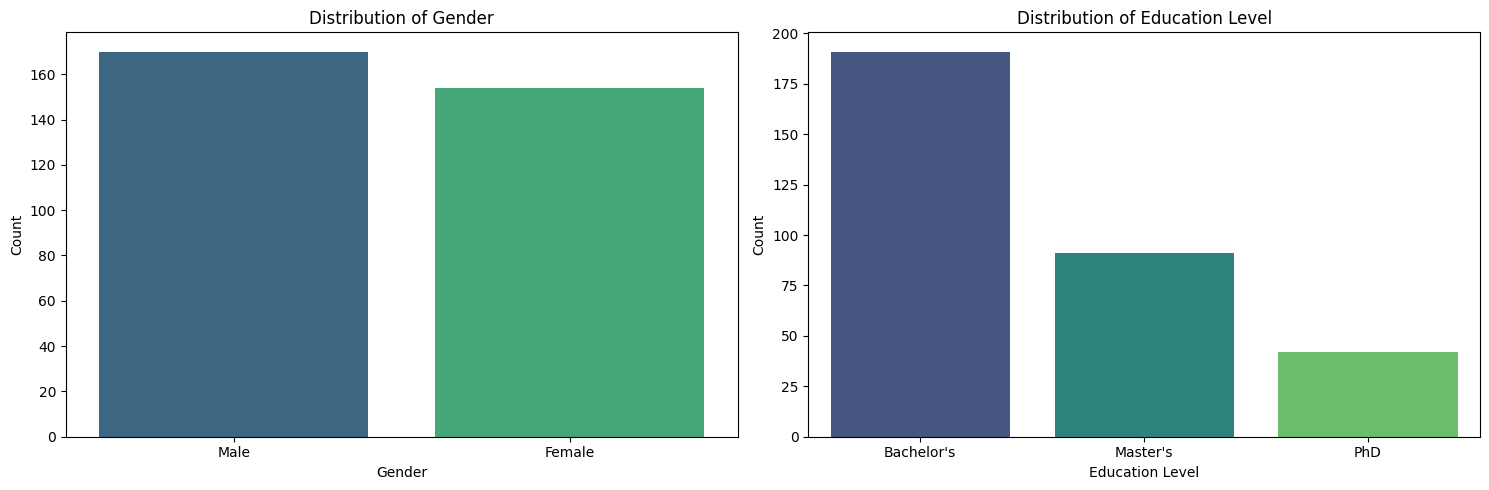

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Gender', data=df, ax=ax[0], palette='viridis', hue='Gender', legend=False)
sns.countplot(x='Education Level', data=df, ax=ax[1], palette='viridis', hue='Education Level', legend=False)

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

plt.tight_layout()
plt.show()

In [18]:
# Get the top 10 job titles with the highest mean salary
# top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

# plt.figure(figsize=(12, 8))
# sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values, palette='viridis', legend=False)

# plt.xlabel('Job Title')
# plt.ylabel('Mean Salary')
# plt.title('Top 10 Highest Paying Jobs')
# plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# plt.tight_layout()
# plt.show()

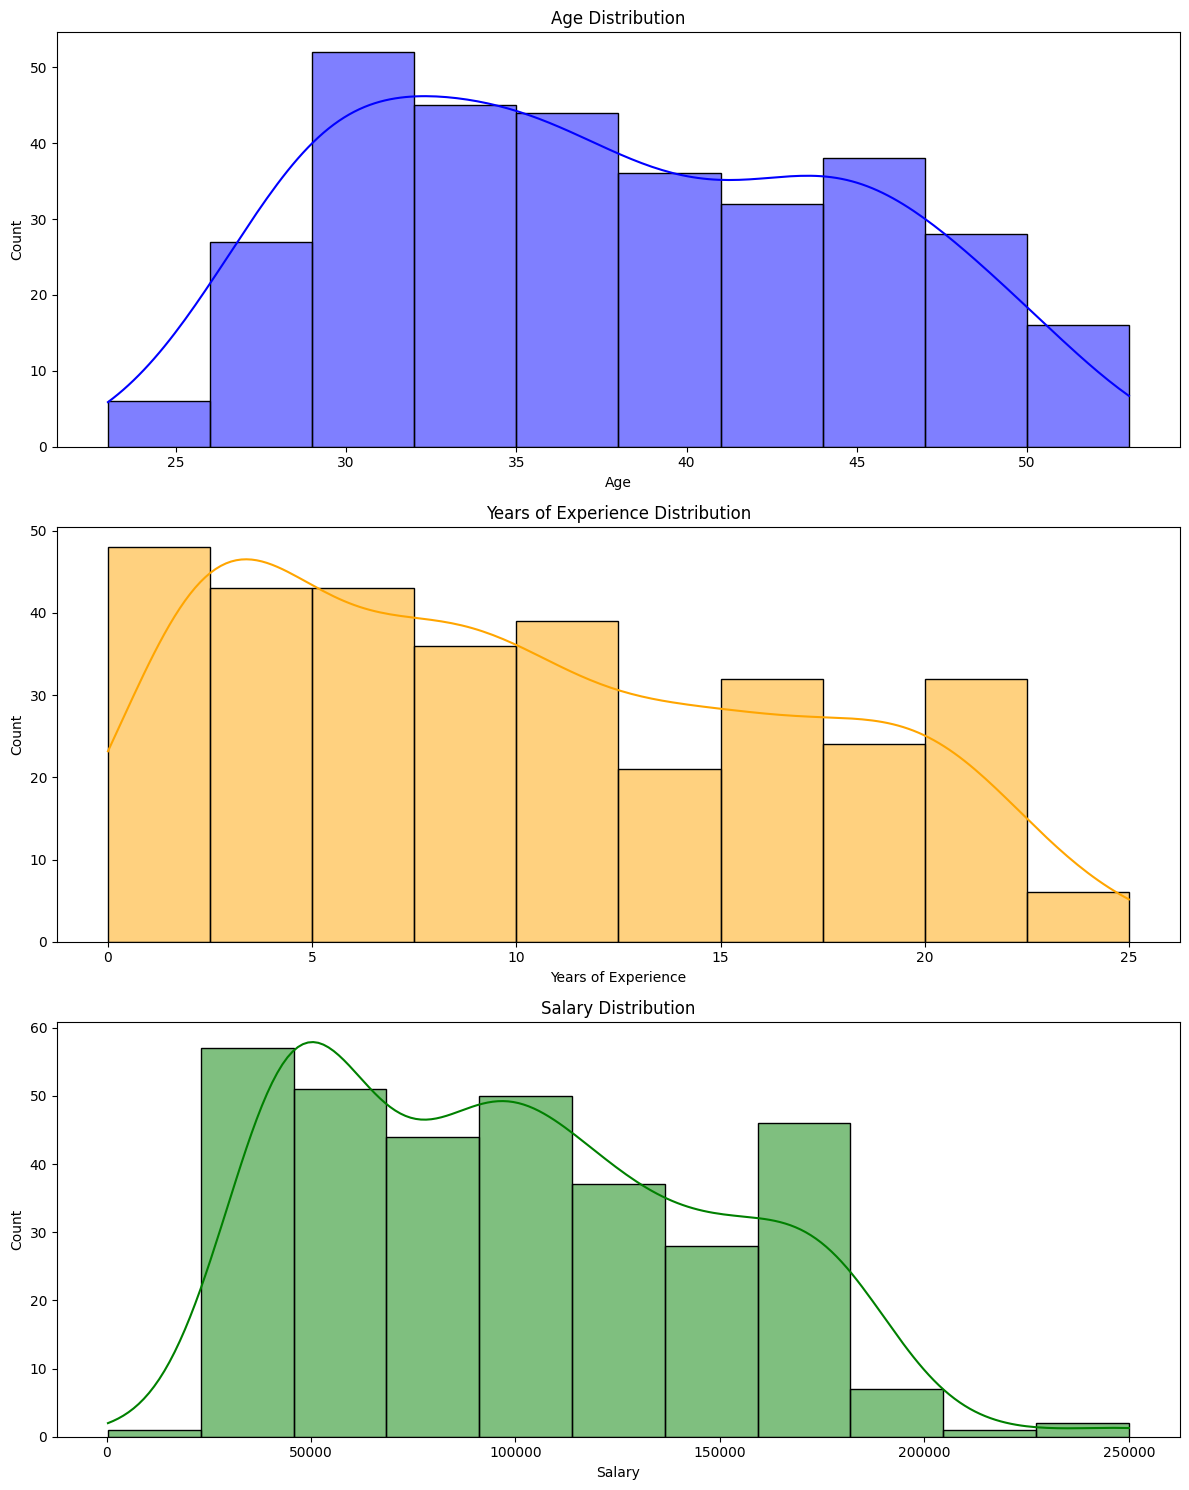

In [19]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience
sns.histplot(df['Years of Experience'], ax=ax[1], color='orange', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary
sns.histplot(df['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()

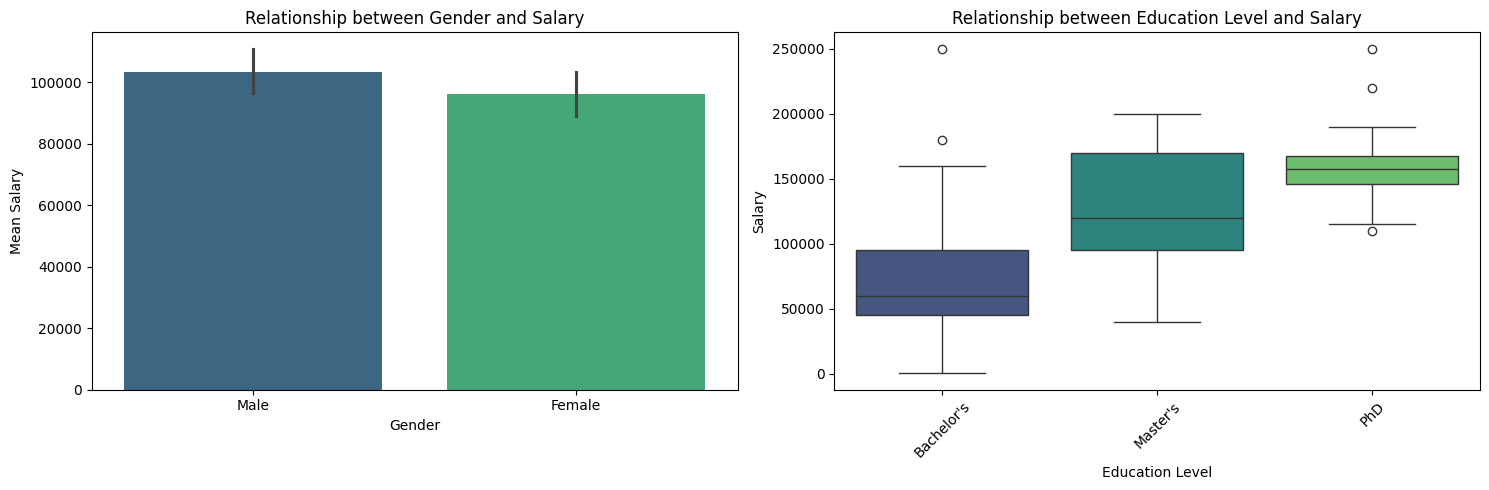

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the relationship between Gender and Salary
sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0], palette='viridis', hue='Gender', legend=False)
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Create a box plot for the relationship between Education Level and Salary
sns.boxplot(x='Education Level', y='Salary', data=df, ax=ax[1], palette='viridis', hue='Education Level', legend=False)
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Comments:
* Male are paid slightly more than female
* Education Level clearly affects the salary paid, higher level means higher salary

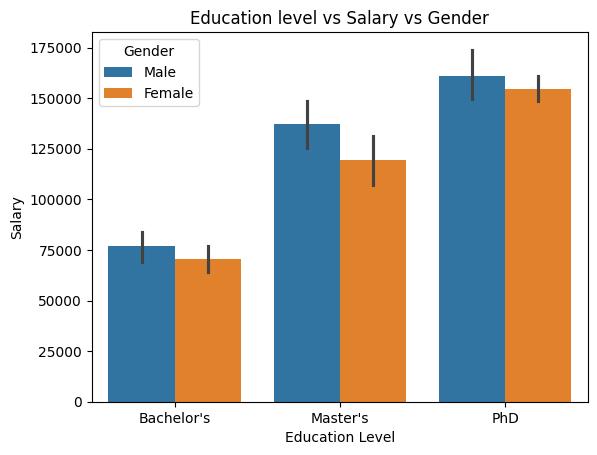

In [21]:
sns.barplot(x='Education Level',y='Salary',data=df,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

Male are paid more than female with the same level of education

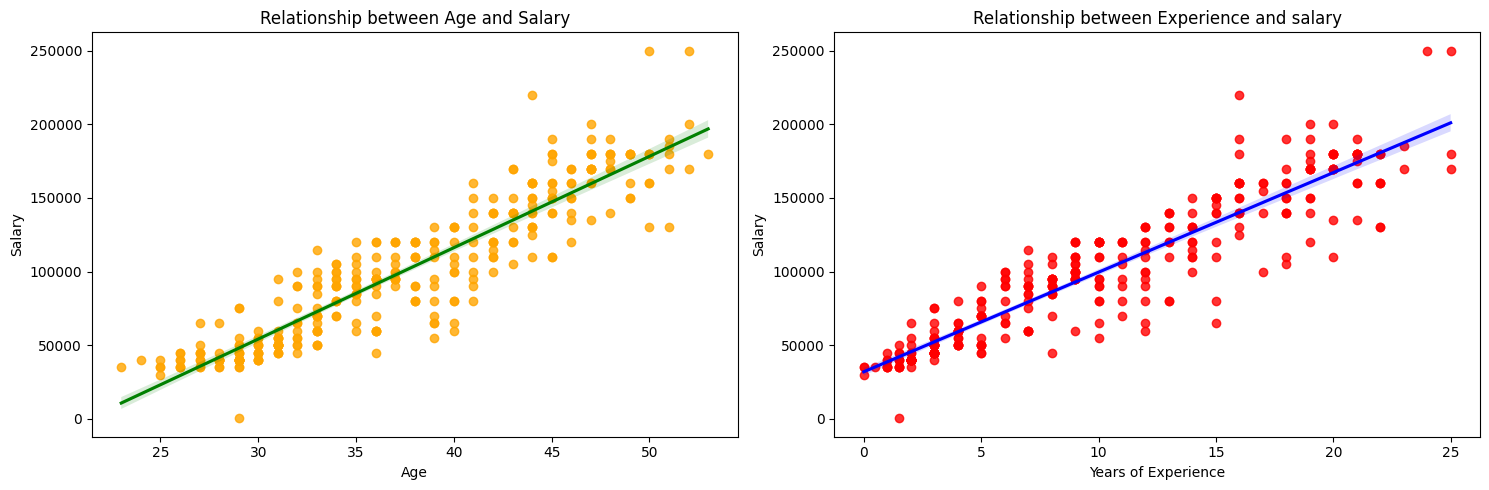

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()

* Older employees get paid more than younger employees.
* Experienced candidates get paid more. The more experience a candidate gains, the more their salary will become.

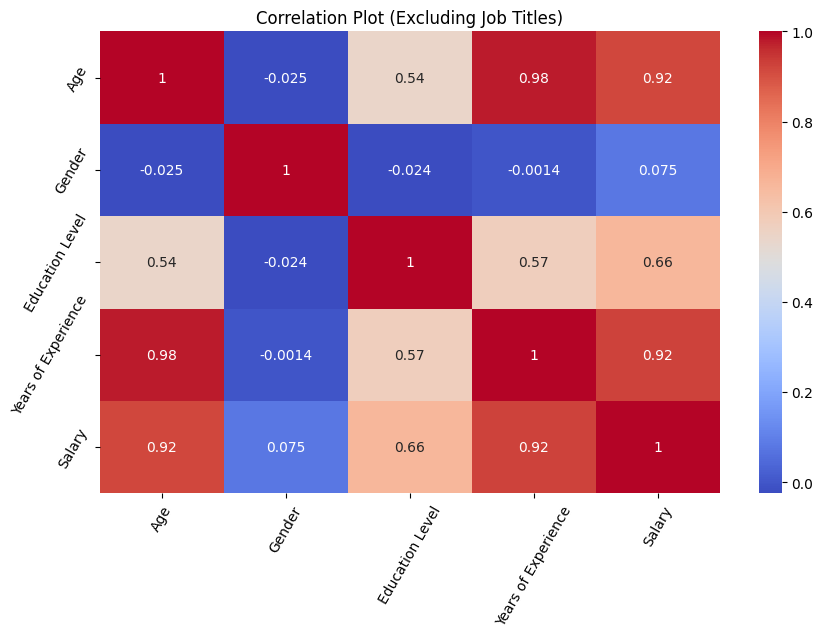

In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Mapping Education Level column
education_mapping = {"Bachelor's": 0, "Master's": 1, "PhD": 2}
df['Education Level'] = df['Education Level'].map(education_mapping)

# Label encoding the categorical variable
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Select columns for the heatmap (excluding the one-hot encoded Job Title columns)
columns_for_heatmap = ['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary']
df_for_heatmap = df[columns_for_heatmap]

# Correlation plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(df_for_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot (Excluding Job Titles)')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

The heatmap reveals the degree of correlation between the variables

* Highest correlation between age and years of experience
* High correlation between salary and years of experience
* High correlation between salary and age
* Moderately high correlation between salary and education level
* Low correlation between gender and all variables

In [24]:
# Detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [25]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [26]:
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [27]:
# Preparing data
# Creating dummies for Job titles
dummies = pd.get_dummies(df['Job Title'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

# Drop Job Title column
df.drop('Job Title',inplace=True,axis=1)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Accountant,Administrative Assistant,Business Analyst,Business Development Manager,Business Intelligence Analyst,...,Supply Chain Manager,Technical Recruiter,Technical Support Specialist,Technical Writer,Training Specialist,UX Designer,UX Researcher,VP of Finance,VP of Operations,Web Developer
0,32.0,1,0,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,0,1,3.0,65000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,1,2,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,0,0,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,1,1,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# Separating the dataset into features and target
features = df.drop('Salary',axis=1)
target = df['Salary']

In [29]:
# Splitting data into 80% train and 20% test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
x_train.shape

(259, 177)

In [30]:
# Predict salary
"""
Use 3 models to predict the salary:
* Linear Regression
* Deision Tree
* Random Forest
"""

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [31]:
# Create dictionary defining models and tuning hyperparameters
model_params = {
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{

        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,10],
            'random_state':[0,42],
            'min_samples_split':[2,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

In [32]:
# Hyper parameter tuning through grid search cv
score=[]

for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(x_train,y_train)

    score.append({
        'Model':model_name,
        'Params':clf.best_params_,
        'MSE(-ve)':clf.best_score_
    })
pd.DataFrame(score)

,Model,Params,MSE(-ve)
0,Linear_Regression,{},-4.310476e+08
1,Decision_Tree,"{'max_depth': 8, 'min_samples_split': 5, 'rand...",-3.499184e+08
2,Random_Forest,{'n_estimators': 20},-3.104560e+08


In [33]:
# Order best models

s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

,Model,Params,MSE(-ve)
2,Random_Forest,{'n_estimators': 20},-3.104560e+08
1,Decision_Tree,"{'max_depth': 8, 'min_samples_split': 5, 'rand...",-3.499184e+08
0,Linear_Regression,{},-4.310476e+08


In [45]:
#2. Random Forest model

rfr_model = RandomForestRegressor(n_estimators=20)
rfr_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20)

In [46]:
rfr_model.score(x_test,y_test)

0.8845138458359165

In [36]:
y_pred_rfr = rfr_model.predict(x_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_rfr))

Mean Squared Error : 246104307.69230768
Mean Absolute Error : 10808.205128205127


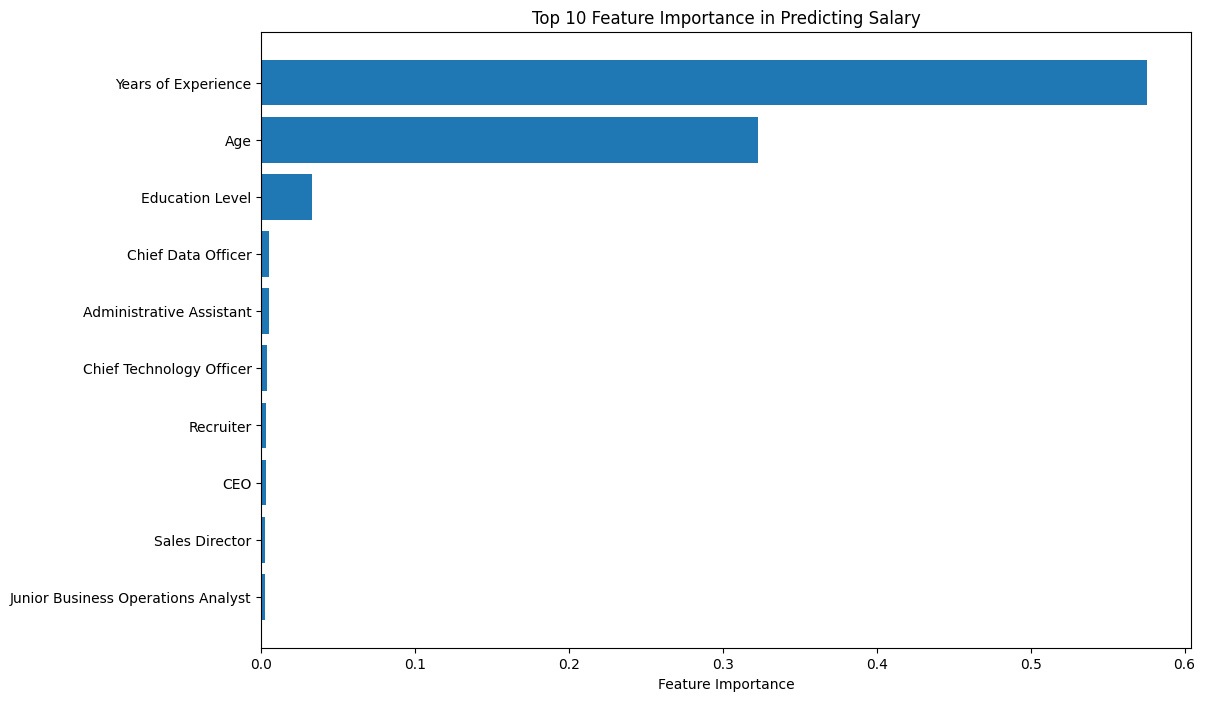

In [37]:
# Access the feature importances of Random Forest Regressor
feature_importances = rfr_model.feature_importances_

# Assuming you have a list of feature names that corresponds to the feature importances
feature_names = list(x_train.columns)

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names[:10], sorted_feature_importances[:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance in Predicting Salary')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

In [38]:
#3. Decision Tree model

dtr_model = DecisionTreeRegressor(max_depth=10,min_samples_split=2,random_state=0)
dtr_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [39]:
dtr_model.score(x_test,y_test)

0.810004401162968

In [40]:
y_pred_dtr = dtr_model.predict(x_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_dtr))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_pred_dtr)))

Mean Squared Error : 359051209.36673534
Mean Absolute Error : 12594.534876887818
Root Mean Squared Error : 18948.646636811172


In [41]:
#1. Linear Regression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [42]:
lr_model.score(x_test,y_test)

0.8670120206696657

In [43]:
y_pred_lr = lr_model.predict(x_test)

print("Mean Squared Error :",mean_squared_error(y_test,y_pred_lr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_lr))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

Mean Squared Error : 251318952.13400126
Mean Absolute Error : 12281.712945784035
Root Mean Squared Error : 15853.042362083099


In conclusion, Random Forest model appears to be the most suitable for predicting salary in this dataset, as it offers the highest predictive accuracy and the lowest error metrics.